In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

In [4]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2022-10-08


'2022-10-08'

In [15]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'


In [6]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'

palette = [grey,cyan] 

In [7]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,2022-08-19,Brandi,1,6,4.7080,14.307000,0.329070,0.838991,5.0290,NaN,NaN,False
1,2022-08-19,Brandi,1,6,0.5350,1.715167,0.311923,0.755324,0.6955,0.041833,16.625498,False
2,2022-08-19,Brandi,1,6,1.5515,5.103667,0.303997,2.554157,1.7655,0.251000,7.033865,False
3,2022-08-19,Brandi,1,6,1.3910,3.012000,0.461819,2.930657,1.3375,0.209167,6.394422,False
4,2022-08-19,Brandi,1,6,2.1400,6.526000,0.327919,1.257324,2.3540,0.083667,28.135458,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2022-09-14,Brandi,4,12,21.4000,23.175667,0.923382,6.205278,21.6140,1.004000,21.527888,False
542,2022-09-14,Brandi,4,12,10.8070,9.538000,1.133047,1.436278,10.8070,0.502000,21.527888,False
543,2022-09-14,Brandi,4,12,13.2680,15.394667,0.861857,12.145611,12.7330,0.167333,76.093626,False
544,2022-09-14,Brandi,4,12,9.4160,9.789000,0.961896,0.934278,13.5890,0.251000,54.139442,True


In [8]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/growth-rate/Plots')

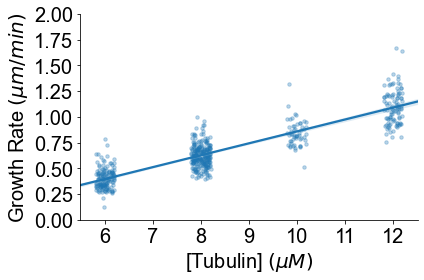

In [9]:
#regplot

ax = sns.regplot(x=tubulin, y='Growth Rate $(\mu m / min)$', truncate=False, scatter_kws={"s": 12,"alpha":0.3}, data=data, fit_reg=True, x_jitter=.2)

#note: change to truncate=True if you don't want the regression line to go across the whole plot and just where you have data

sns.despine(left=False)
sns.set_style("whitegrid")

sns.set_style("ticks")
plt.rcParams['axes.linewidth'] = 2.5

plt.xlabel('[Tubulin] $(\mu M)$', fontsize=20)
plt.ylabel('Growth Rate $(\mu m/min)$', fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize =20)
plt.ylim(0,2)
plt.tight_layout()

plt.savefig(newmydir/('Growth Rate'+date+'.pdf'))

plt.show()

## Making a DataFrame

In [20]:
df=data[[tubulin,GrowthRate]]
df

,[Tubulin] $(\mu M)$,Growth Rate $(\mu m / min)$
0,6,0.329070
1,6,0.311923
2,6,0.303997
3,6,0.461819
4,6,0.327919
...,...,...
541,12,0.923382
542,12,1.133047
543,12,0.861857
544,12,0.961896


In [42]:
GRmn='Mean Growth Rate' r'$(\mu m / min)$'
dfmn=df.groupby(tubulin, as_index=False).mean()
dfmn.rename(columns={GrowthRate:GRmn}, inplace=True)

dfmn

,[Tubulin] $(\mu M)$,Mean Growth Rate$(\mu m / min)$
0,6,0.403111
1,8,0.623198
2,10,0.842666
3,12,1.098787


In [45]:
GRstd='Std Dev.'
dfstd=df.groupby(tubulin, as_index=False).std()
dfstd.rename(columns={GrowthRate:GRstd}, inplace=True)
dfstd

,[Tubulin] $(\mu M)$,Std Dev.
0,6,0.099268
1,8,0.108193
2,10,0.123256
3,12,0.169727


In [65]:
dferr=pd.merge(dfmn,dfstd)
dferr

,[Tubulin] $(\mu M)$,Mean Growth Rate$(\mu m / min)$,Std Dev.
0,6,0.403111,0.099268
1,8,0.623198,0.108193
2,10,0.842666,0.123256
3,12,1.098787,0.169727


## Plotting

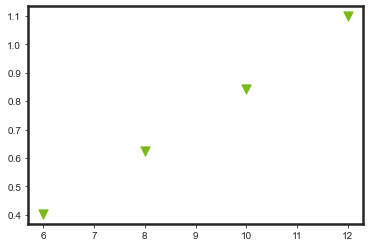

In [79]:
plt.scatter(x=tubulin,y=GRmn,s=85,c=green,marker='v',data=dferr)

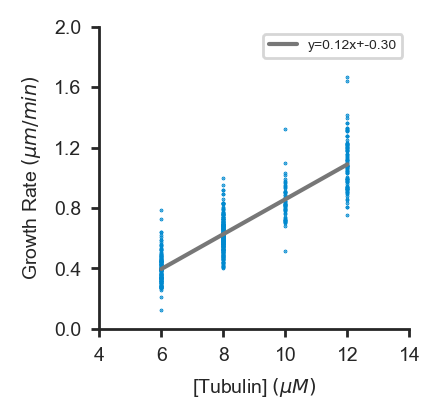

In [155]:
fig = plt.figure(figsize=(2,2), dpi=200)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(1)
ax.spines['bottom'].set_lw(1)
ax.tick_params(axis='both', width = 1, length = 3)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax.set_xlabel(tubulin,fontsize=7)
ax.set_ylabel(GrowthRate, fontsize=7)

x=data[tubulin]
y=data[GrowthRate]


plt.xlim(4, 14)
plt.ylim(0, 2)

ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,line,grey,label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(x,y, marker='.',c=cyan, s=0.5)
plt.legend(fontsize=5)